<center><h1 style='color:red'>Coronavirus Disease: COVID-19 Dashboard

COVID-19's effect on the entire world is apparent as we are struggling to fight this deadly virus. The first COVID-19 case was reported on December 31, 2019 in Wuhan, China. On January 21, 2020, the CDC (Center for Disease Control) confirmed the first COVID-19 case in the U.S. ("A Timeline of Covid-19 Developments in 2020").

Since then, cases have risen exponentially and numerous precautionary measures have been taken to prevent the spread of the virus. By May 26, 2021, there were 168 million cases around the world with 3.49 million deaths. AI, machine learning, and data science allows us to analyze the spread of COVID-19 to better understand the virus. It also allows us to help inform the world of new discoveries around COVID-19.

Predictions for confirmed cases, recovered, deaths, and were made based on the dataset. To make these predictions, I used Prophet. Prophet is a forecasting tool from Facebook that uses data to predict future behavoir. Prophet gives a future trend to the data instead of just predictions. It makes forecasts based on irregular holidays and year, weekly, and daily seasonality.

A novel strain of coronavirus — SARS-CoV-2 — was first detected in December 2019 in Wuhan, a city in China’s Hubei province with a population of 11 million, after an outbreak of pneumonia without an obvious cause. The virus has now spread to over 200 countries and territories across the globe, and was characterised as a pandemic by the World Health Organization (WHO).

**Dataset:**
Data is from scrapped from JHU github repository. Any variation in the data there will also reflect in this notebook|




**Importing required Libraries:**

In [1]:
# to load json files
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen

# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns
#color patch
import matplotlib.patches as mpatches

# hide warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

**Importing and Reading Datasets:**

In [2]:
full_table = pd.read_csv('covid_19_clean_complete.csv')
full_table.head()


Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [3]:
# Grouped by day, country
# =======================
full_grouped = pd.read_csv('full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
full_grouped.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22    Afghanistan          0       0          0       0          0   
1 2020-01-22        Albania          0       0          0       0          0   
2 2020-01-22        Algeria          0       0          0       0          0   
3 2020-01-22        Andorra          0       0          0       0          0   
4 2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [4]:
# Day wise
# ========
day_wise = pd.read_csv('day_wise.csv')
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
day_wise.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [5]:
# Country wise
# ============
country_wise = pd.read_csv('country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
country_wise.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [6]:
# Worldometer data
# ================
worldometer_data = pd.read_csv('worldometer_data.csv')
worldometer_data = worldometer_data.replace('', np.nan).fillna(0)
worldometer_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       0.0   
1         Brazil  South America  2.127107e+08     2917562       0.0   
2          India           Asia  1.381345e+09     2025409       0.0   
3         Russia         Europe  1.459409e+08      871894       0.0   
4   South Africa         Africa  5.938157e+07      538184       0.0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        0.0       2576668.0           0.0    2292707.0   
1      98644.0        0.0       2047660.0           0.0     771258.0   
2      41638.0        0.0       1377384.0           0.0     606387.0   
3      14606.0        0.0        676357.0           0.0     180931.0   
4       9604.0        0.0        387316.0           0.0     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

**Data Cleaning and Checking Null Values**

In [7]:
country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
worldometer_data.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [9]:
full_grouped.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [10]:
day_wise.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

**Heat Map for day wise Dataset**

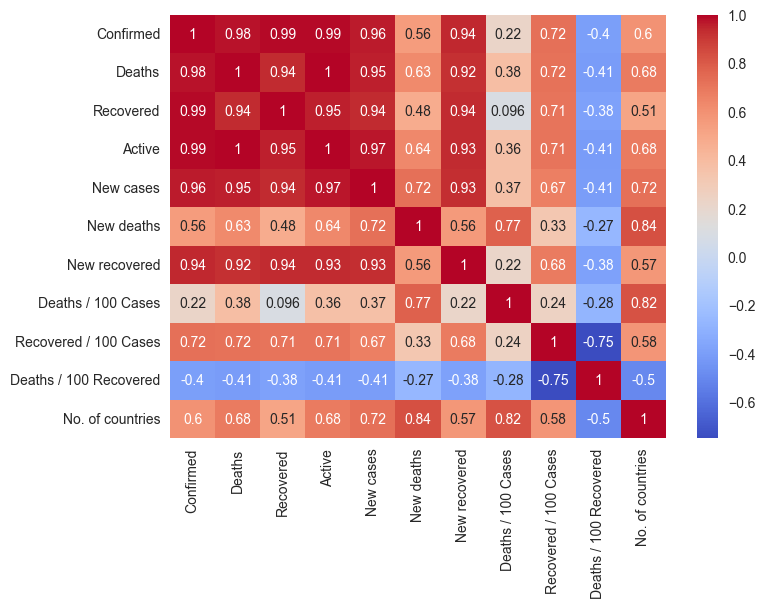

In [11]:
# create the heatmap
sns.heatmap(day_wise.corr(), annot=True, cmap="coolwarm")

# display the heatmap
plt.show()

**COVID-19 Status**

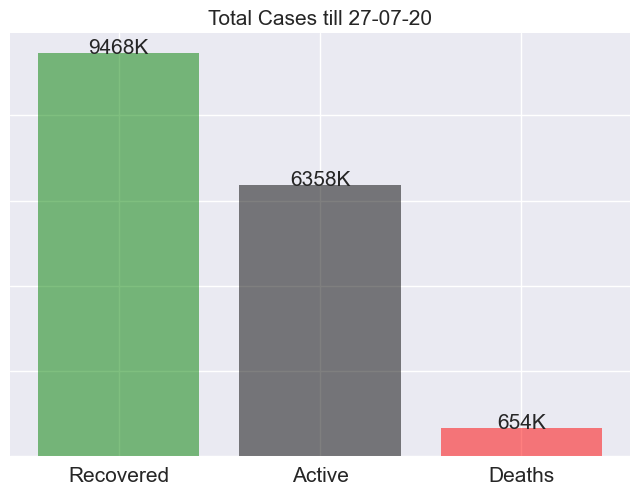

In [12]:
#get values from dataframe
temp = day_wise[['Date','Deaths', 'Recovered', 'Active']].tail(1)
dt = temp.Date.dt.strftime("%d-%m-%y").values
temp = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
temp.sort_values(by='value', inplace=True, ascending=False)

#fig = plt.treemap(temp, path=["variable"], values="value", height=225)
#fig.data[0].textinfo = 'label+text+value'
#fig.show()
bars = plt.bar(temp.variable, temp.value, color=['green', 'black', 'red'], alpha=0.5)

#remove ytick labels
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-5, str(int(bar.get_height()/1000)) + 'K', 
                 ha='center', fontsize=15)
    
plt.xticks(temp.variable.values,fontsize=15)
plt.title('Total Cases till {}'.format(dt[0]), fontsize=15);

### HYPOTHESIS - 1

**A month-by-month breakdown of the number of covid-19 conforming cases, active cases, new cases, deaths, and recovered cases.**

The graph below depicts the number of confirmed cases, active cases, new cases, and recovered cases per month.

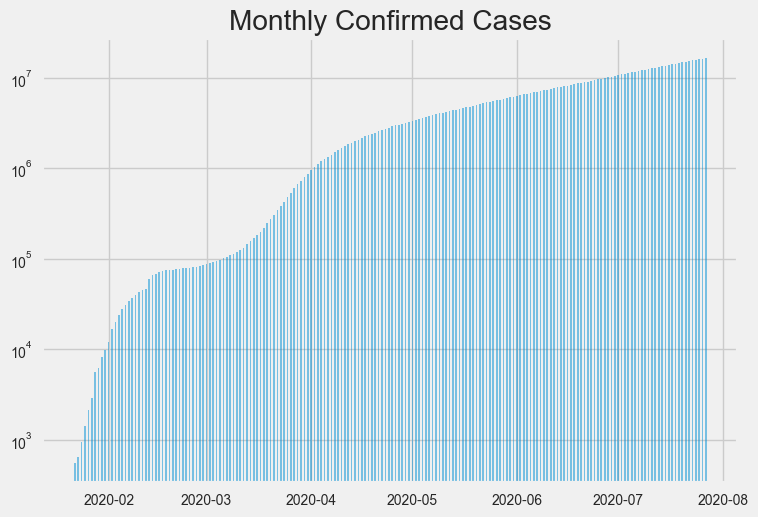

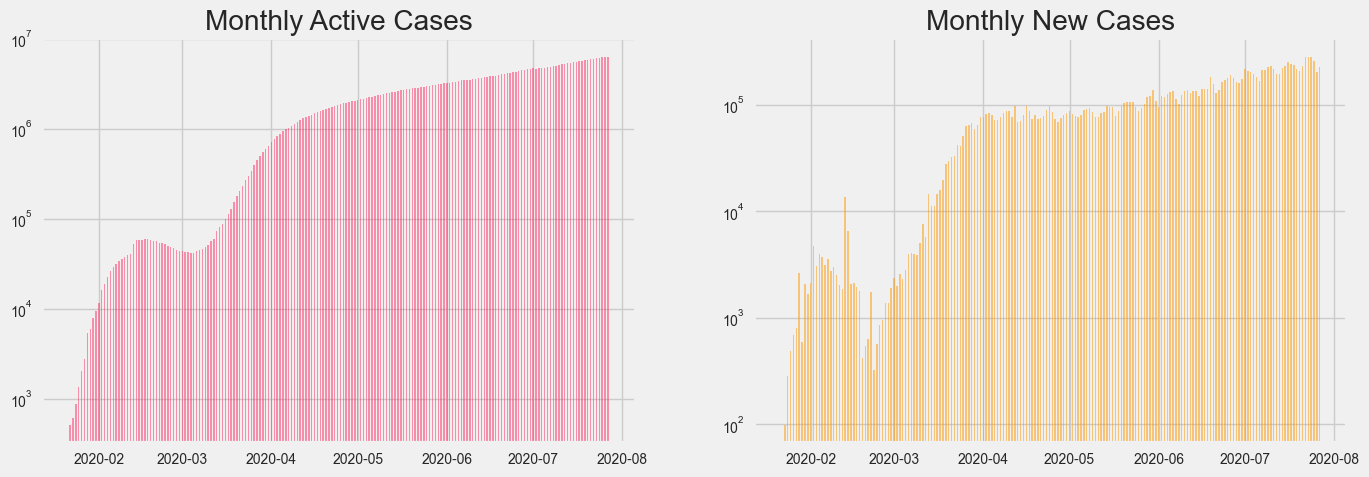

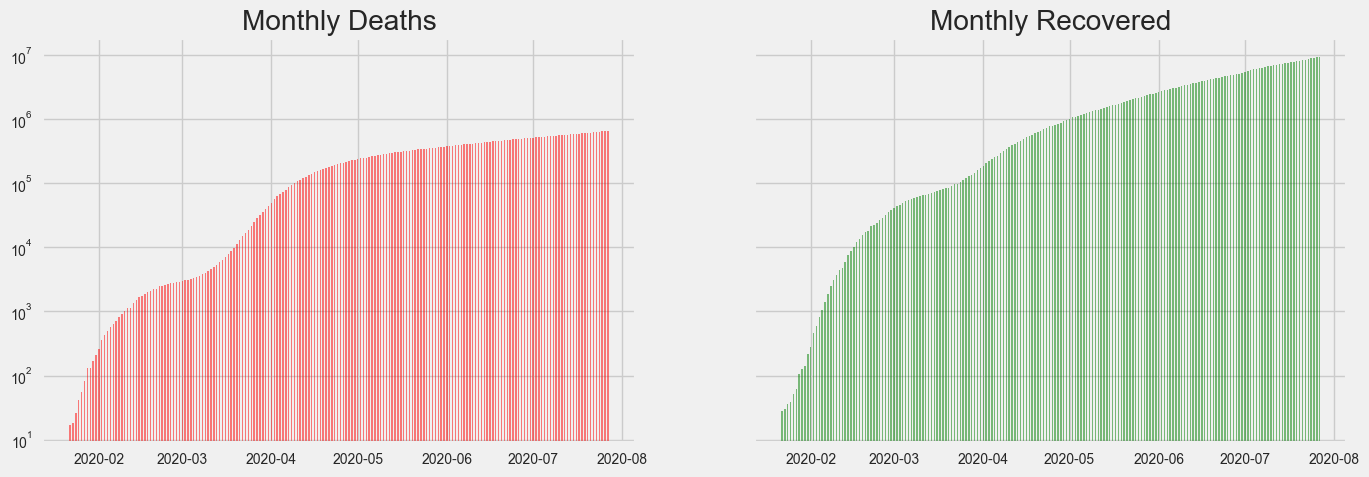

In [13]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
plt.bar(day_wise.Date,day_wise.Confirmed,width=0.5,alpha=0.5)

ax.set_yscale("log")
plt.title('Monthly Confirmed Cases');

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.bar(day_wise.Date,day_wise.Active,color='#ff2e63', width=0.5,alpha=0.5)
ax1.set_yscale("log")
ax1.set_title('Monthly Active Cases');

ax2.bar(day_wise.Date,day_wise['New cases'],color='#fe9801', width=0.5,alpha=0.5)
ax2.set_yscale("log")
ax2.set_title('Monthly New Cases');

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)

ax1.bar(day_wise.Date,day_wise.Deaths,color='red', width=0.5,alpha=0.5)
ax1.set_yscale("log")
ax1.set_title('Monthly Deaths');

ax2.bar(day_wise.Date,day_wise.Recovered,color='green', width=0.5,alpha=0.5)
ax2.set_yscale("log")
ax2.set_title('Monthly Recovered');




### HYPOTHESIS - 2

**The Top 15 countries for all confirmed cases, active cases, deaths, recovered cases, new cases of covid, and new recovered cases of covid were determined using a horizontal bar graph.**

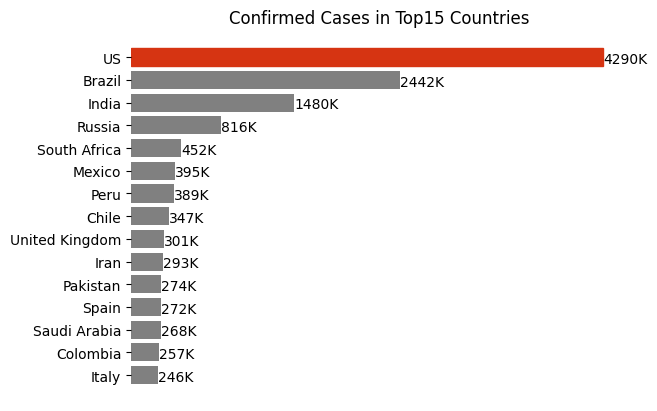

In [14]:
plt.style.use('default')

temp = country_wise[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False)[0:15]
temp.sort_values(by='Confirmed', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Confirmed'],color=['gray'])
bars[-1].set_color('#D63412')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Confirmed Cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Confirmed']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

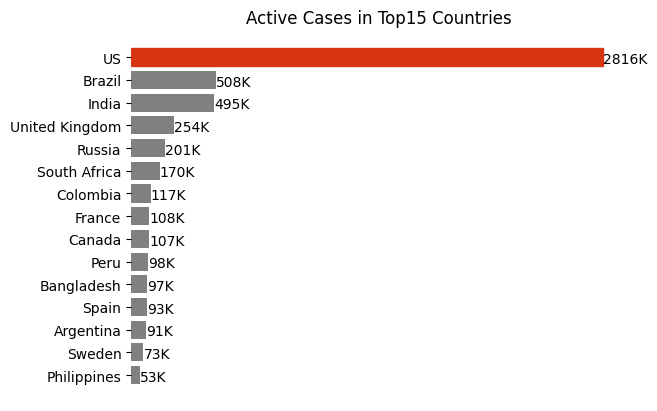

In [15]:
temp = country_wise[['Country/Region', 'Active']].sort_values(by='Active', ascending=False)[0:15]
temp.sort_values(by='Active', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Active'],color=['gray'])
bars[-1].set_color('#D63412')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Active Cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Active']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

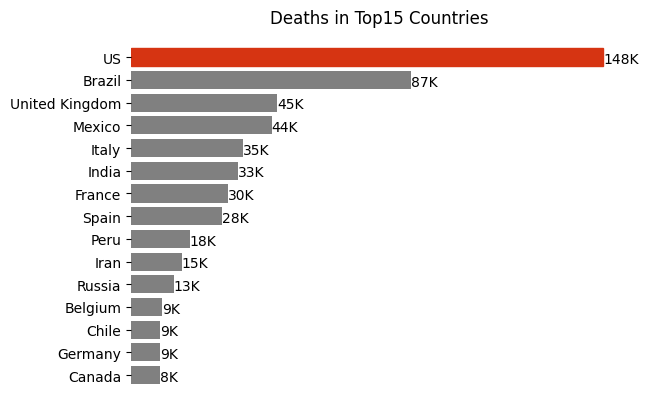

In [16]:
temp = country_wise[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False)[0:15]
temp.sort_values(by='Deaths', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Deaths'],color=['gray'])
bars[-1].set_color('#D63412')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Deaths in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Deaths']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

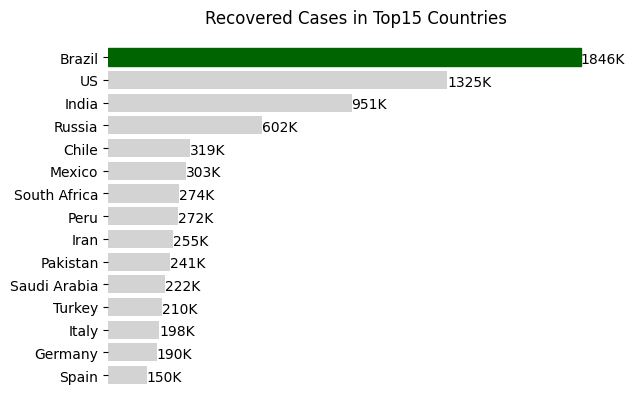

In [17]:
temp = country_wise[['Country/Region', 'Recovered']].sort_values(by='Recovered', ascending=False)[0:15]
temp.sort_values(by='Recovered', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Recovered'],color=['lightgray'])
bars[-1].set_color('darkgreen')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Recovered Cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Recovered']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


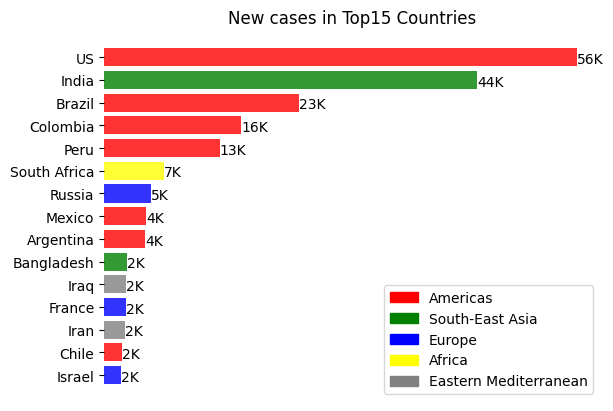

In [18]:
dic = {'Americas':'red','South-East Asia':'green','Europe':'blue','Africa':'yellow','Eastern Mediterranean':'gray'}
temp = country_wise[['Country/Region', 'New cases', 'WHO Region']].sort_values(by='New cases', ascending=False)[0:15]
temp.sort_values(by='New cases', inplace=True)
temp['WHO Region']=temp['WHO Region'].map(dic)
temp['WHO Region'].dropna(inplace=True)


bars = plt.barh(temp['Country/Region'], temp['New cases'], color=temp['WHO Region'], alpha=0.8)
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('New cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')
plt.legend()

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for i, v in enumerate(temp['New cases']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)
    
#Add Legend
patchList = []
for key in dic:
        data_key = mpatches.Patch(color=dic[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList, loc='best');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


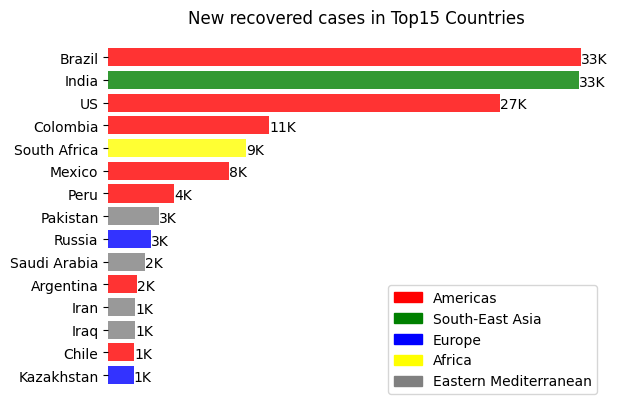

In [19]:
temp = country_wise[['Country/Region', 'New recovered', 'WHO Region']].sort_values(by='New recovered', ascending=False)[0:15]
temp.sort_values(by='New recovered', inplace=True)
temp['WHO Region']=temp['WHO Region'].map(dic)
temp['WHO Region'].dropna(inplace=True)

bars = plt.barh(temp['Country/Region'], temp['New recovered'], color=temp['WHO Region'], alpha=0.8)
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('New recovered cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')
plt.legend()

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for i, v in enumerate(temp['New recovered']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)
    
#Add Legend
patchList = []
for key in dic:
        data_key = mpatches.Patch(color=dic[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList, loc='best');

### HYPOTHESIS - 3

**Let's start with Interactive Visualization with the help of plotly And lets see confirmed cases and death cases entrie world and also a world map displying cases over time through a scroll bar.**

World Wide spread using Dynamic Analysis.


We can use plotly visualisation tool for dynamic plotting.Python visualization tool that’s capable of handling geographical, scientific, statistical, and financial data. Plotly has several advantages over matplotlib. One of the main advantages is that only a few lines of codes are necessary to create aesthetically pleasing, interactive plots.

In [20]:
import plotly.express as px

**WORLD MAP**

In [21]:
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale="Reds")
    fig.show()

In [22]:
plot_map(country_wise, 'Confirmed')

In [23]:
plot_map(country_wise, 'Deaths')

**Now below we can see cases increases over the time!**

In [24]:
#the plot i will be using is same choropleth plot as used in above plots the 
#differnece is i will be updating the plot with colors according to the animation frame!

fig = px.choropleth(full_grouped, locations="Country/Region", 
                    color=np.log(full_grouped["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.Reds)
fig.update(layout_coloraxis_showscale=False)
fig.show()

### HYPOTHESIS - 4

**Comparing number of deaths vs confimed cases using scatter plot in plotly**
**Top 10 countries Recover ratio and Death ratios affected by the Corona virus**

In [25]:
fig = px.scatter(country_wise.sort_values('Deaths', ascending=False).iloc[:20, :], 
                 x='Confirmed', y='Deaths', color='Country/Region', size='Confirmed', 
                 height=700, text='Country/Region', log_x=True, log_y=True, 
                 title='Deaths vs Confirmed (Scale is in log10)')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [26]:
temp = country_wise.iloc[:,0:5].sort_values(ascending=False, by='Confirmed').set_index('Country/Region')[:10]
temp['Death ratio'] = temp.Deaths/temp.Confirmed
temp['recover ratio'] = temp.Recovered/temp.Confirmed
temp['var'] = 1

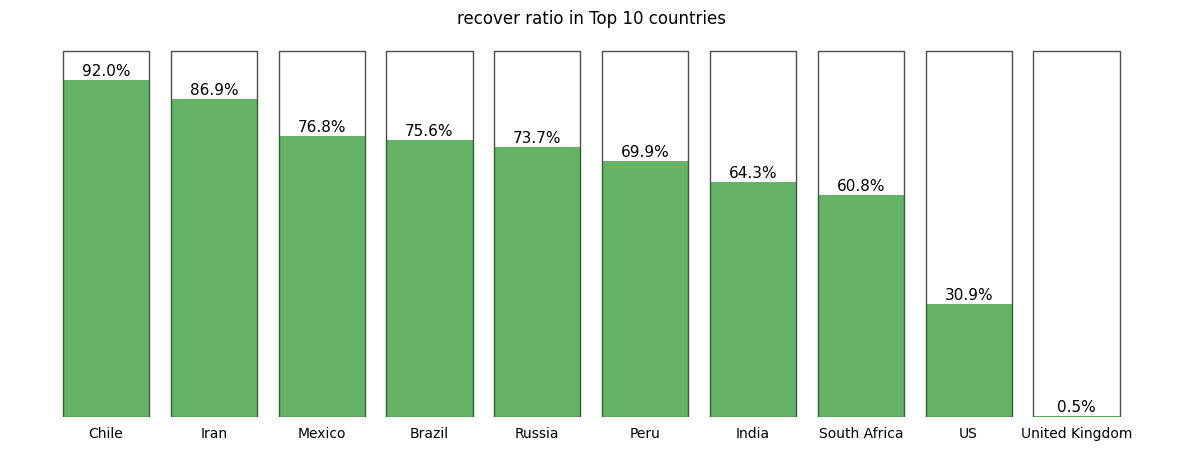

In [27]:
temp.sort_values(by='recover ratio',ascending=False,inplace=True)

plt.figure(figsize=(15,5))
plt.bar(temp.index,temp['var'],color='white',edgecolor='black',alpha=0.7)
bars = plt.bar(temp.index,temp['recover ratio'],color='green',alpha=0.6)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, str(round(bar.get_height()*100,1)) + '%', 
                 ha='center', color='black', fontsize=11)
plt.title('recover ratio in Top 10 countries');

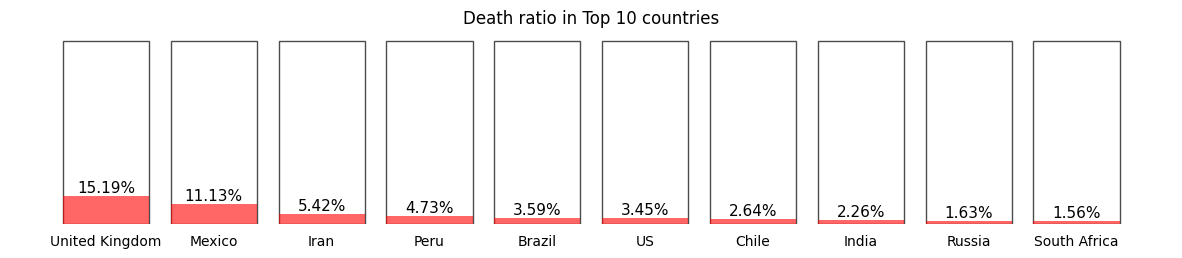

In [28]:
temp.sort_values(by='Death ratio',ascending=False,inplace=True)

plt.figure(figsize=(15,2.5))
plt.bar(temp.index,temp['var'],color='white',edgecolor='black',alpha=0.7)
bars = plt.bar(temp.index,temp['Death ratio'],color='red',alpha=0.6)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, str(round(bar.get_height()*100,2)) + '%', 
                 ha='center', color='black', fontsize=11)
plt.title('Death ratio in Top 10 countries');